# Introduction to the openPMD-viewer GUI

This notebook explains how to use the openPMD GUI.

The GUI relies on the IPython notebook, and on the package `ipywidgets`. You will need to install these packages in order to be able to use the GUI.

## (optional) Preparing this notebook to run it locally

If you choose to run this notebook on your local machine, you will need to download the openPMD data files which will then be visualized. To do so, execute the following cell.

In [1]:
import os

def download_if_absent( dataset_name ):
    "Function that downloads and decompress a chosen dataset"
    if os.path.exists( dataset_name ) is False:
        import wget, tarfile
        tar_name = "%s.tar.gz" %dataset_name
        url = "https://github.com/openPMD/openPMD-example-datasets/raw/draft/%s" %tar_name
        wget.download(url, tar_name)
        with tarfile.open( tar_name ) as tar_file:
            tar_file.extractall()
        os.remove( tar_name )

download_if_absent( 'example-2d' )
download_if_absent( 'example-3d' )
download_if_absent( 'example-thetaMode' )

In addition, we choose here to incorporate the plots inside the notebook.

In [7]:
%matplotlib notebook
# Use `%matplotlib widget` when using JupyterLab

## Prepare and use the GUI 

In order to start using the GUI:
- Load the class `OpenPMDTimeSeries` from the module `opmd_viewer`

In [3]:
import os
from opmd_viewer import OpenPMDTimeSeries

- Create a time series object by pointing to the folder which contains the corresponding openPMD data

In [4]:
workdir = r'\\afs\ifh.de\group\pitz\data\lixiangk\sim\2019\Warp2\4x1'
workdir = r'D:\PITZ\2019\Warp3\32188'
os.chdir(workdir)

ts_2d = OpenPMDTimeSeries('./hdf5/')

- Call the `slider` method

SEJveChjaGlsZHJlbj0oQnV0dG9uKGRlc2NyaXB0aW9uPXUnLScsIGxheW91dD1MYXlvdXQod2lkdGg9dSc0MHB4JyksIHN0eWxlPUJ1dHRvblN0eWxlKCkpLCBCdXR0b24oZGVzY3JpcHRpb27igKY=


SEJveChjaGlsZHJlbj0oVkJveChjaGlsZHJlbj0oQWNjb3JkaW9uKGNoaWxkcmVuPShWQm94KGNoaWxkcmVuPShUb2dnbGVCdXR0b25zKGRlc2NyaXB0aW9uPXUnRmllbGQ6Jywgb3B0aW9ucz3igKY=


<IPython.core.display.Javascript object>


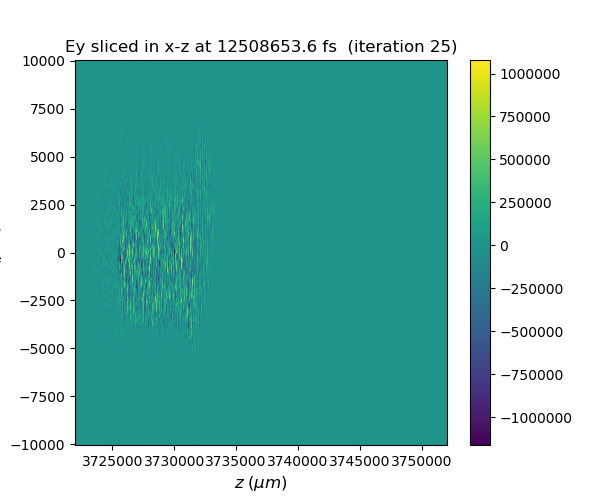

<IPython.core.display.Javascript object>


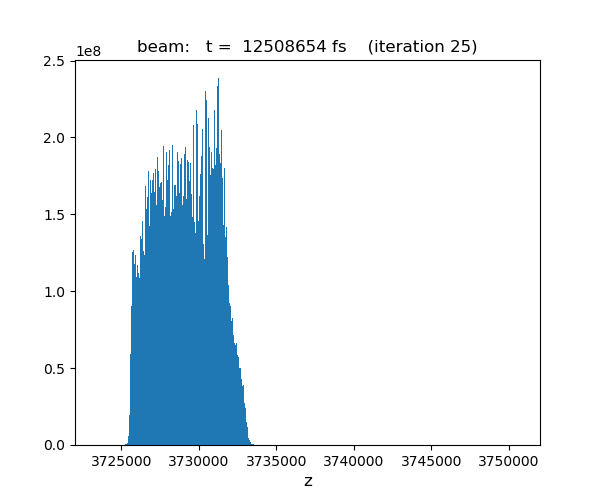

In [8]:
ts_2d.slider()

Calling this method will insert the following panel inside the notebook. (Note that the panel below is an **non-interactive image**, which is here for the users that are viewing this notebook online. Calling the `slider` method in a live notebook, will produce a truly **interactive** panel.)
![GUI_representation](./img/GUI_image2d.png)

Under the hood, this panel is calling the openPMD-viewer API with the `plot=True` option, and thus the user can quickly plot different quantities by clicking on the panel:
- The top slider allows the user to choose the time for which to do the plot. Clicking on the `+` and `-` buttons moves from iteration to iteration.
- The left subpanel allows to choose the plotted fields 
- The right subpanel allows to choose the particle quantites (note that it also detects the species present in the file)
- The `Plotting options` menu gathers some common matplotlib options.

Please try this interactive interface for yourself, in order to explore its capabilities!

## GUI for specific field geometries

Note that the above panel will adapt to the field geometry, and to the presence or absence of particles in the data files.


### 3D datasets
For instance, the code below creates a slider that explores a 3D Cartesian dataset (and contains only electrons; no ions).

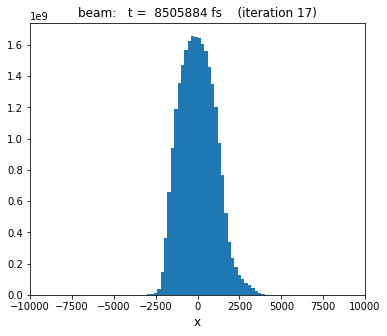

In [5]:
ts_3d = OpenPMDTimeSeries('./hdf5/')
ts_3d.slider( fields_figure=2, particles_figure=3 )

This panel is reproduced below for the users that are viewing this notebook online. As can be seen, the GUI interface includes buttons for slicing the 3D array.

![GUI_image](./img/GUI_image3d.png)



### Cylindrical datasets with azimuthal decomposition

Similarly, the code below explores a dataset with azimuthal decomposition (2 azimuthal modes). Moreover, this dataset does not contain any particles, as reflect by the aspect of the GUI.

In [ ]:
ts_circ = OpenPMDTimeSeries('./example-thetaMode/hdf5/')
ts_circ.slider( fields_figure=4 )

The interactive panel is again reproduced here for online users. It includes buttons for the choice of modes and for the angle theta of observation.

![GUI_image](./img/GUI_image_thetaMode.png)